In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
fashion_train = pd.read_csv('fashion-mnist_train.csv')

In [3]:
fashion_test = pd.read_csv(r'C:\Users\Jatin\Downloads\Udemy\P39-Fashion-MNIST-Datasets\fashion-mnist_test.csv')

In [4]:
fashion_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fashion_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
training = np.array(fashion_train,dtype='float32')
test = np.array(fashion_test,dtype='float32')

Text(0.5, 1.0, '8.0')

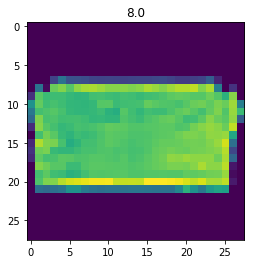

In [7]:
import random
i=random.randint(1,60000)
plt.imshow(training[i,1:].reshape(28,28))
plt.title(training[i,0])

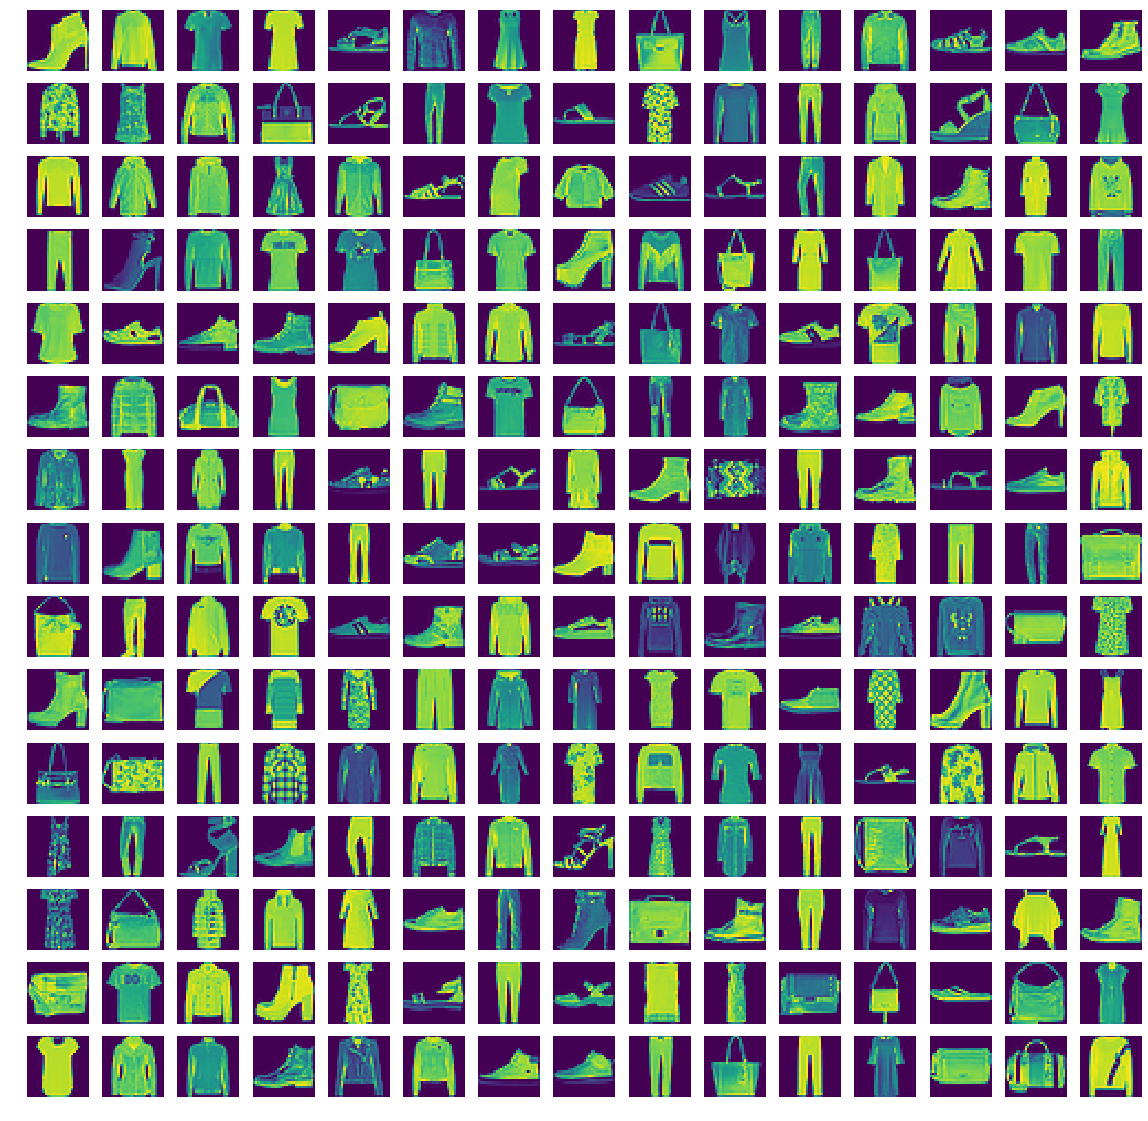

In [8]:
fig ,axes = plt.subplots(15,15,figsize=(20,20))
axes=axes.ravel()
for i in range(225):
    index=random.randint(0,len(training))
    axes[i].imshow(training[index,1:].reshape(28,28))
    axes[i].axis('off')
  
    

In [9]:
X_train = training[:,1:] / 255
y_train = training[:,:1]

In [10]:
X_test = test[:,1:] /255
y_test = test[:,:1]

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_validate,y_train,y_validate = train_test_split(X_train,y_train,test_size=0.2,random_state=12345)

In [22]:
X_train=X_train.reshape(X_train.shape[0],*(28,28,1))
X_test=X_test.reshape(X_test.shape[0],*(28,28,1))
X_validate=X_validate.reshape(X_validate.shape[0],*(28,28,1))

In [27]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [25]:
cnn_model =Sequential()

W0810 00:16:56.865304  4844 deprecation_wrapper.py:119] From C:\Users\Jatin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [26]:
cnn_model.add(Conv2D(32,3,3,input_shape=(28,28,1),activation='relu'))

C:\Users\Jatin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  """Entry point for launching an IPython kernel.
W0810 00:19:47.312630  4844 deprecation_wrapper.py:119] From C:\Users\Jatin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0810 00:19:47.639385  4844 deprecation_wrapper.py:119] From C:\Users\Jatin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [28]:
cnn_model.add(MaxPooling2D(2,2))

W0810 00:21:18.517377  4844 deprecation_wrapper.py:119] From C:\Users\Jatin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [29]:
cnn_model.add(Flatten())

In [31]:
cnn_model.add(Dense(units=32,activation='relu'))

In [32]:
cnn_model.add(Dense(units=10,activation='sigmoid'))

In [34]:
cnn_model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])

W0810 00:26:03.863666  4844 deprecation_wrapper.py:119] From C:\Users\Jatin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3341: The name tf.log is deprecated. Please use tf.math.log instead.



In [35]:
cnn_model.fit(X_train,
              y_train,
              batch_size=100,
              nb_epoch=50,
              verbose=3,
              validation_data=(X_validate,y_validate))

C:\Users\Jatin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  
W0810 00:28:15.846232  4844 deprecation.py:323] From C:\Users\Jatin\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0810 00:28:15.889100  4844 deprecation_wrapper.py:119] From C:\Users\Jatin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 48000 samples, validate on 12000 samples
Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50


In [39]:
evaluate  = cnn_model.evaluate(X_validate,y_validate)

12000/12000 [==============================] - 1s 72us/step


In [56]:
pred = cnn_model.predict_classes(X_test)

In [57]:
from sklearn.metrics import classification_report ,confusion_matrix

In [59]:
print(confusion_matrix(y_test,pred))

[[859   2  12  13   7   0  98   0   9   0]
 [  2 990   0   5   1   0   2   0   0   0]
 [ 23   0 825  14  78   1  58   0   1   0]
 [ 22  24  11 890  29   1  22   1   0   0]
 [  5   1  32  18 909   0  34   0   1   0]
 [  1   3   0   0   0 956   1  28   2   9]
 [108   6  38  25  70   0 748   0   5   0]
 [  0   0   0   0   0   6   0 966   0  28]
 [  7   0   3   2   0   3   9   2 973   1]
 [  0   0   0   0   0   4   0  26   1 969]]


In [60]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85      1000
         1.0       0.96      0.99      0.98      1000
         2.0       0.90      0.82      0.86      1000
         3.0       0.92      0.89      0.90      1000
         4.0       0.83      0.91      0.87      1000
         5.0       0.98      0.96      0.97      1000
         6.0       0.77      0.75      0.76      1000
         7.0       0.94      0.97      0.96      1000
         8.0       0.98      0.97      0.98      1000
         9.0       0.96      0.97      0.97      1000

   micro avg       0.91      0.91      0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



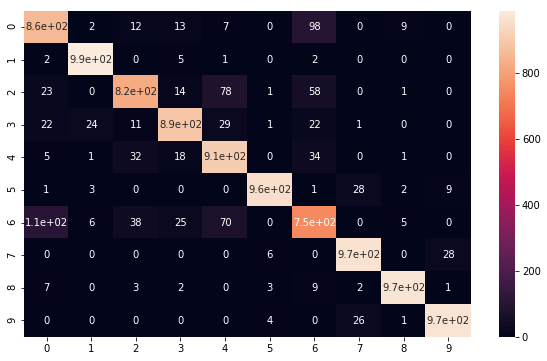

In [64]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,pred),annot=True)

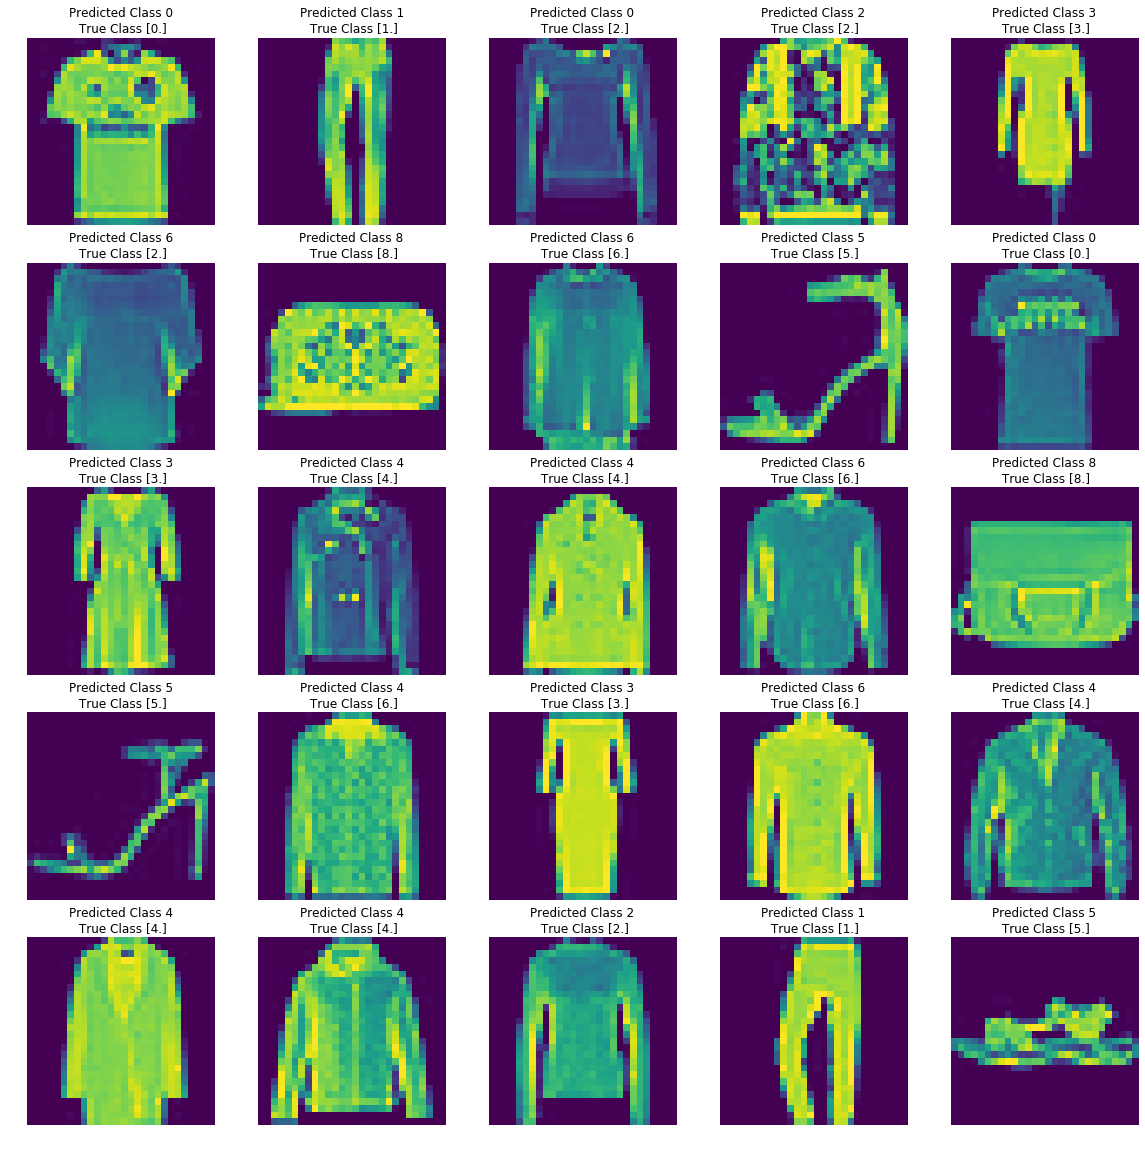

In [65]:
fig , axes =plt.subplots(5,5,figsize=(20,20))
axes=axes.ravel()
for i in range(25):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title('Predicted Class {}\n True Class {}'.format(pred[i],y_test[i]))
    axes[i].axis('off')